In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline
sns.set(style = 'whitegrid',color_codes=True)
import scipy.stats as s
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

* No Null values in any columns

In [ ]:
df.info()

In [ ]:
df.Name.value_counts()

In [ ]:
df1 = df.sort_values(by = ['Reviews','User Rating'], ascending = [False,False]).reset_index()
df1

In [ ]:
df_fic = df[df.Genre == 'Fiction']
df_nfic = df[df.Genre == 'Non Fiction']

In [ ]:
df_fic.groupby('Name').sum()['Reviews'].sort_values(ascending = False)[0:3].plot(kind = 'bar',figsize=[12,5]);
plt.xticks(rotation = 0);

In [ ]:
df_nfic.groupby('Name').sum()['Reviews'].sort_values(ascending = False)[0:3].plot(kind = 'bar',figsize=[25,7]);
plt.xticks(rotation = 0);

In [ ]:
pd.crosstab(df.Year,df.Genre).plot(figsize=[20,5]);

In [ ]:
pd.crosstab(df.Genre, df.Year, values = df.Reviews, aggfunc= 'sum').plot(kind = 'bar', stacked =True, figsize = [15,7]);

In [ ]:
plt.figure(figsize=[20,5])
sns.countplot(x=df.Year, hue = df.Genre);

In [ ]:
plt.figure(figsize=[15,5])
sns.distplot(df['User Rating'] ,kde = True);

In [ ]:
plt.figure(figsize=[10,5])
sns.distplot(df['Reviews'] ,kde = True,color = 'green');
plt.axvline(df.Reviews.median(),color='red')

In [ ]:
plt.figure(figsize=[15,5])
sns.scatterplot(x = df.Reviews, y = df['User Rating'],hue ='Genre', data=df,palette='RdBu');

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.suptitle('Rating based on Genre')
axes[0].set_title("Fiction Rating")
axes[1].set_title("Non Fiction Rating")
sns.boxplot(ax=axes[0],y=df_fic['User Rating'], data = df_fic,color='red')
sns.boxplot(ax=axes[1],y=df_nfic['User Rating'], data = df_nfic)
plt.show()

**HEATMAP TO FIND THE CORRELATION BETWEEN THE ATTRIBUTES**

Here we can see there are no as such correlation between any attributes.

In [ ]:
corr_mat = df.corr()
sns.heatmap(corr_mat,cmap = 'cubehelix_r', annot = True)

In [ ]:
reviews = df[['Reviews','Genre']].groupby([df.Genre])
rev_sum = reviews.sum()
rev_sum

In [ ]:
rated = []
for i in df['User Rating']:
    if i >= 4.5:
        rated.append('High_Rating')
    elif i <4.5 and i >= 3.5:
        rated.append('Moderate Rating')
    else:
        rated.append('Low Rating')
df['Rating_category'] = rated

In [ ]:
df.head()

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(x=df.Rating_category, palette = 'icefire', hue = 'Genre', data =df);

# Statistical Inferences

<b> 1. To test wether Genre has affect on Reviews. </b>

In [ ]:
fic_rev = df_fic['Reviews']
nfic_rev = df_nfic['Reviews']

In [ ]:
s.shapiro(df.Reviews)

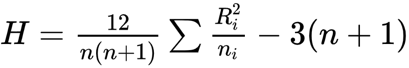

In [ ]:
s.stats.kruskal(fic_rev,nfic_rev)

<b> 2. To test wether Genre has affect on rating. </b>

In [ ]:
s.shapiro(df['User Rating'])

As p value is less than 0.05 we can conclude that the User Rating data is not Normally distributed.

In [ ]:
usr_fic = df[df.Genre == 'Fiction']['User Rating']
usr_nfic = df[df.Genre == 'Non Fiction']['User Rating']

In [ ]:
s.stats.kruskal(usr_fic,usr_nfic)

<b> 3. To Check wether Rating Category and Genre are independent.

In [ ]:
tab = pd.crosstab(df.Genre,df.Rating_category)
tab

In [ ]:
chi_stat , p, dof, exp_val = s.chi2_contingency(tab.values, correction=False)
print('Chi Square Statistic:', chi_stat)
print('P Value:', round(p,3))
print('Expected Values to be independent:',exp_val)

<b> 4. To check Affect of Rating category and Genre on Reviews </b>

In [ ]:
df.head()

In [ ]:
model = ols('Reviews~ C(Rating_category) + C(Genre)',data = df).fit()
sm.stats.anova_lm(model, typ =2)

As f value for both the category is greater than 0.05 we can conclude that there is no significant affect of Genre and Rating Category on Reviews. 